In [7]:
# Import built-in librarires
import os
from os.path import abspath

# Import external librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import local libraries
from src.plot_distribution import plot_distribution

## Load Data

In [3]:
# Load all data
demo = pd.read_csv(abspath("../data/T_demo.csv"))
stage = pd.read_csv(abspath("../data/T_stage.csv"))

# Biomarkers
cre = pd.read_csv(abspath("../data/T_creatinine.csv"))
dbp = pd.read_csv(abspath("../data/T_DBP.csv"))
sbp = pd.read_csv(abspath("../data/T_SBP.csv"))
hgb = pd.read_csv(abspath("../data/T_HGB.csv"))
glu = pd.read_csv(abspath("../data/T_glucose.csv"))
ldl = pd.read_csv(abspath("../data/T_ldl.csv"))

# Medication
meds = pd.read_csv(abspath("../data/T_meds.csv"))

## Check for missing data

In [4]:
# Check for missing data on all tables
print(demo.isna().any())
print(stage.isna().any())

# Biomarkers
print(cre.isna().any())
print(dbp.isna().any())
print(sbp.isna().any())
print(hgb.isna().any())
print(glu.isna().any())
print(ldl.isna().any())

# Meication
print(meds.isna().any())

id        False
race      False
gender    False
age       False
dtype: bool
id                False
Stage_Progress    False
dtype: bool
id       False
value    False
time     False
dtype: bool
id       False
value    False
time     False
dtype: bool
id       False
value    False
time     False
dtype: bool
id       False
value    False
time     False
dtype: bool
id       False
value    False
time     False
dtype: bool
id       False
value    False
time     False
dtype: bool
id              False
drug            False
daily_dosage    False
start_day       False
end_day         False
dtype: bool


## Explore demographics

In [5]:
# Explore the demographics
# For race
print(demo.race.value_counts())
print(demo.race.value_counts()/demo.race.value_counts().sum())

White       226
Unknown      26
Black        24
Asian        17
Hispanic      7
Name: race, dtype: int64
White       0.753333
Unknown     0.086667
Black       0.080000
Asian       0.056667
Hispanic    0.023333
Name: race, dtype: float64


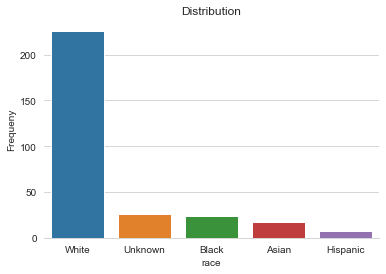

In [8]:
plot_distribution(demo.race.value_counts())

In [9]:
# For sex (not gender)
print(demo.gender.value_counts())
print(demo.gender.value_counts()/demo.gender.value_counts().sum())

Female    176
Male      124
Name: gender, dtype: int64
Female    0.586667
Male      0.413333
Name: gender, dtype: float64


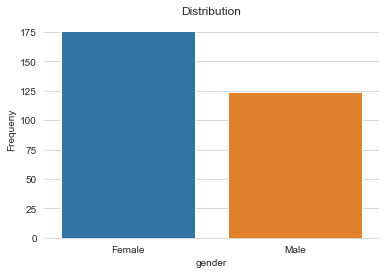

In [10]:
plot_distribution(demo.gender.value_counts())

In [11]:
# Describe the age of the patient population
demo.age.describe()

count    300.000000
mean      70.383333
std        9.247058
min       46.000000
25%       64.000000
50%       71.000000
75%       78.000000
max       86.000000
Name: age, dtype: float64

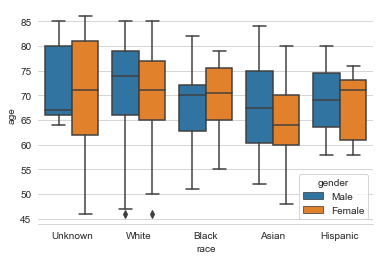

In [13]:
# See age distribution by race and gender
sns.boxplot(x="race", y="age", hue="gender", data=demo)
sns.despine(left=True)

## Explore Stage distribution

In [14]:
print(stage.Stage_Progress.value_counts())
print(stage.Stage_Progress.value_counts()/stage.Stage_Progress.value_counts().sum())

False    200
True     100
Name: Stage_Progress, dtype: int64
False    0.666667
True     0.333333
Name: Stage_Progress, dtype: float64


In [15]:
# Let's explore the stage distribution by sex and race
demo_stage = pd.concat([demo,stage], axis=1)

for i, data in demo_stage.groupby("race"):
    print(i)
    print(data.Stage_Progress.value_counts())
    print(data.Stage_Progress.value_counts()/data.Stage_Progress.value_counts().sum())
    print("-"*30)

Asian
False    12
True      5
Name: Stage_Progress, dtype: int64
False    0.705882
True     0.294118
Name: Stage_Progress, dtype: float64
------------------------------
Black
False    18
True      6
Name: Stage_Progress, dtype: int64
False    0.75
True     0.25
Name: Stage_Progress, dtype: float64
------------------------------
Hispanic
False    4
True     3
Name: Stage_Progress, dtype: int64
False    0.571429
True     0.428571
Name: Stage_Progress, dtype: float64
------------------------------
Unknown
False    16
True     10
Name: Stage_Progress, dtype: int64
False    0.615385
True     0.384615
Name: Stage_Progress, dtype: float64
------------------------------
White
False    150
True      76
Name: Stage_Progress, dtype: int64
False    0.663717
True     0.336283
Name: Stage_Progress, dtype: float64
------------------------------


<AxesSubplot:xlabel='race', ylabel='Stage_Progress'>

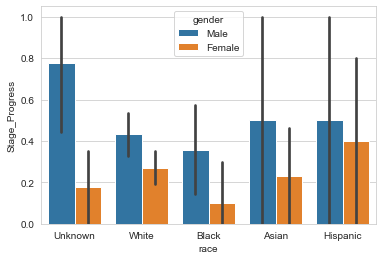

In [16]:
sns.barplot(data=demo_stage, x="race", y="Stage_Progress", hue="gender")

## Explore Biomarkers

### Creatinine

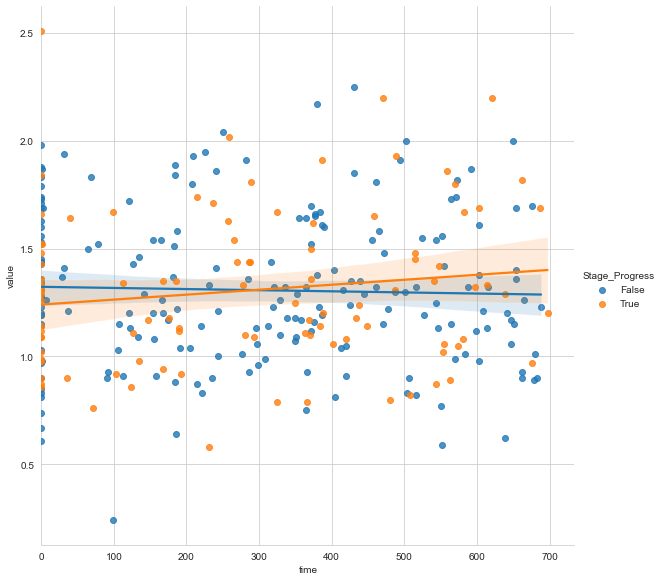

In [87]:
# Show Creatinine
sns.lmplot(x="time", y="value", hue="Stage_Progress",
              data=pd.concat([cre, stage],axis=1),
              height=8, aspect=1)
sns.despine(left=True)

### Diastolic Blood Pressure (DBP)

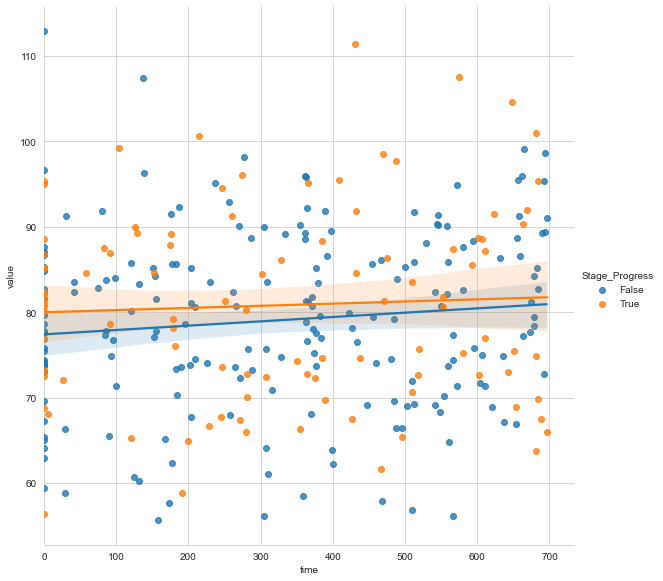

In [88]:
# Show DBP
sns.lmplot(x="time", y="value", hue="Stage_Progress",
              data=pd.concat([dbp, stage],axis=1),
              height=8, aspect=1)
sns.despine(left=True)

### Systolic Blood Pressure (SBP)

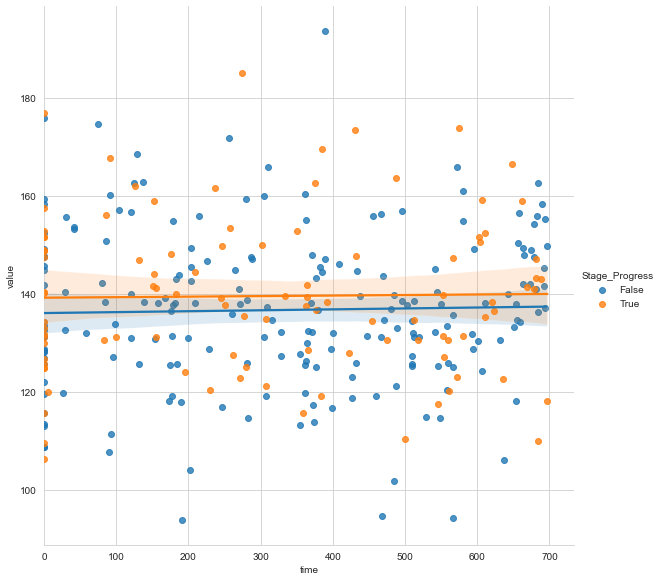

In [89]:
# Show SBP
sns.lmplot(x="time", y="value", hue="Stage_Progress",
              data=pd.concat([sbp, stage],axis=1),
              height=8, aspect=1)
sns.despine(left=True)

### Hemoglobin

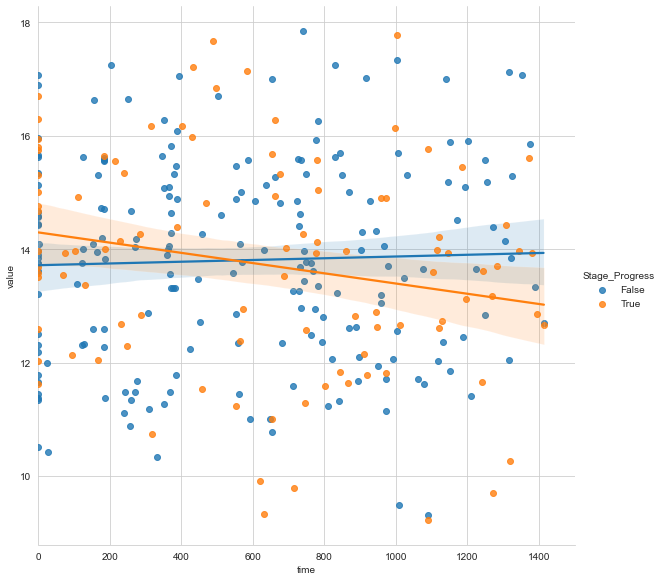

In [90]:
# Show hemoglobin
sns.lmplot(x="time", y="value", hue="Stage_Progress",
              data=pd.concat([hgb, stage],axis=1),
              height=8, aspect=1)
sns.despine(left=True)

### Glucose

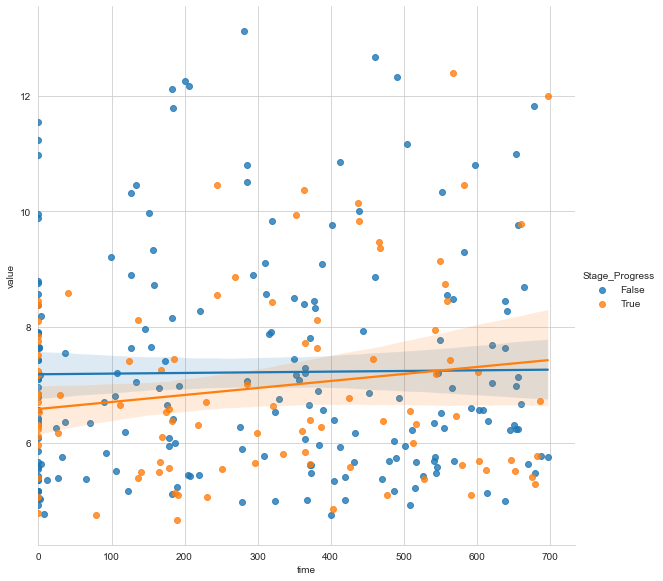

In [91]:
# Show glucose
sns.lmplot(x="time", y="value", hue="Stage_Progress",
              data=pd.concat([glu, stage],axis=1),
              height=8, aspect=1)
sns.despine(left=True)

### Low Density Lipoprotein

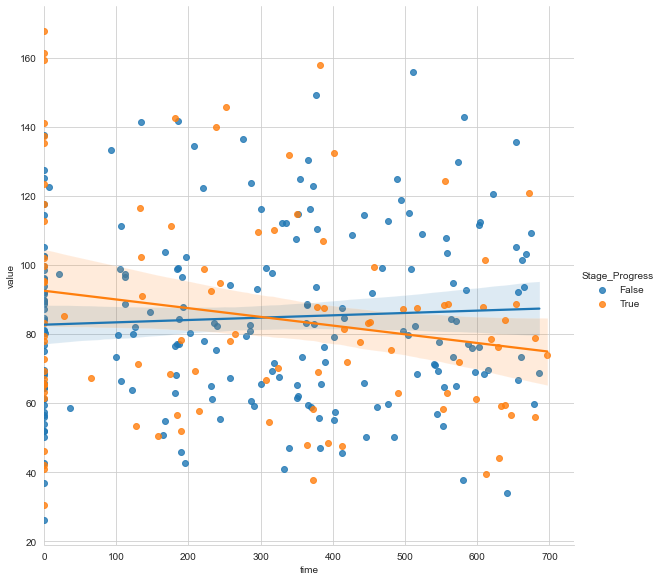

In [92]:
# Show low density lipoproteins
sns.lmplot(x="time", y="value", hue="Stage_Progress", scatter=True,
              data=pd.concat([ldl, stage],axis=1),
              height=8, aspect=1)
sns.despine(left=True)

## Medicines

,Asian,Black,Hispanic,Unknown,White
0,False,False,False,True,False
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
295,False,False,False,False,True
296,False,False,False,False,True
297,False,False,False,True,False
298,True,False,False,False,False


In [21]:
stage

,id,Stage_Progress
0,0,True
1,1,False
2,2,True
3,3,False
4,4,True
...,...,...
295,295,True
296,296,False
297,297,True
298,298,False
